# Método de Gauss-Seidel para Sistemas de Equações Lineares Algébricas (S.E.L.A.)

### Importar as biblioteas

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

### Definir o sistema

$$\begin{equation}
\begin{cases}
    3x+2y=6\\
    2x+3y=5
\end{cases}
\end{equation}$$

### Forma matricial:

$$\begin{pmatrix}
3 & 2\\
2 & 3
\end{pmatrix} \cdot \begin{pmatrix}
x\\
y
\end{pmatrix} = \begin{pmatrix}
6\\
5
\end{pmatrix}$$

In [2]:
A = np.array([[3,2],
              [2,3]])

b = np.array([[6],
              [5]])

e = 1e-6

### Critérios de parada:

1. $|A \cdot \vec{x}^{^{(n+1)}}-\vec{b}| < \epsilon$
2. $|\vec{x}^{^{(n+1)}}-\vec{x}^{^{(n)}}| < \epsilon$

In [3]:
def criterio1(A,x,b,e) :
    return np.linalg.norm(A.dot(x)-b)<e

def criterio2(xnew,xold,e) :
    return np.linalg.norm(xnew-xold)<e

### Passos

1) Dividir (A|b) pelos elementos da diagonal principal, resulta em (F|d).

In [4]:
F = []
d = []

for i in range(len(A)) :
    F.append(A[i]/A[i][i])
    d.append(b[i]/A[i][i])

F = np.array(F)
d = np.array(d).reshape(-1,1)

print(F, F.shape)
print(d, d.shape)

[[1.         0.66666667]
 [0.66666667 1.        ]] (2, 2)
[[2.        ]
 [1.66666667]] (2, 1)


2) Executar até o critério de parada

$A \vec{x} = \vec{b}; det A \neq \emptyset$

$(L+D+U)\vec{x}=\vec{b}$

$(L+D)\vec{x} + U\vec{x}=\vec{b}$

$(L+D)\vec{x}^{^{(n+1)}} \approx \vec{b} - U\vec{x}{^{(n)}}$

$(L+D)^{-1}(L+D)\vec{x}^{^{(n+1)}} \approx (L+D)^{-1} \cdot [\vec{b} - U\vec{x}{^{(n)}}]$

$$\vec{x}^{^{(n+1)}} \approx (L+D)^{-1}\vec{b} - (L+D)^{-1}U\vec{x}{^{(n)}}$$

In [5]:
x = np.zeros(b.shape)
resultsx = [0]
resultsy = [0]
n = 0

U = np.triu(F,1) # Upper Triangle
L = np.tril(F,-1) # Lower Triangle
D = F-U-L # Main Diagonal
LDI = np.linalg.inv(L + D)

while not(criterio1(A,x,b,e)) and n<200 :
    x = LDI.dot(d) - LDI.dot(U).dot(x)
    
    resultsx.append(x[0][0])
    resultsy.append(x[1][0])
    
    n+=1

Convergência (18 iterações):


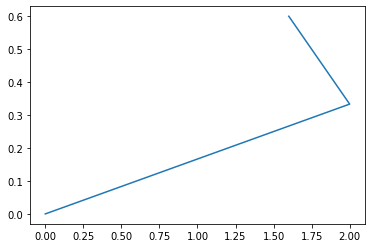

Solução
[[1.60000041]
 [0.59999973]]

Resultado
[[6.00000069]
 [5.        ]]

Diferença
[[6.86761488e-07]
 [0.00000000e+00]]
6.867614876782113e-07



In [6]:
print(f"Convergência ({n} iterações):")

plt.plot(resultsx, resultsy)
plt.show()

print("Solução",x,sep='\n',end='\n\n')
print("Resultado",A.dot(x),sep='\n',end='\n\n')
print("Diferença",A.dot(x)-b,np.linalg.norm(A.dot(x)-b),sep='\n',end='\n\n')

***

### Forma equacional

Para cada $x_i$:

$$x_i^{(k+1)} = \frac{b_i - \cdots - a_{i(i-2)}x_{(i-2)}^{(k)} - a_{i(i-1)}x_{(i-1)}^{(k)} - a_{i(i+1)}x_{(i+1)}^{(k)} - a_{i(i+2)}x_{(i+2)}^{(k)} - \cdots - a_{in}x_n^{(k)}}{a_{ii}}$$

Imediatamente atualiza os valores de x após executar as operações da iteração $k$.

In [7]:
x = np.zeros(b.shape)
n = 0

resultsx = [0]
resultsy = [0]

while not(criterio1(A,x,b,e)) and n<200 :
    for i in range(len(A)) :
        x[i] = (b[i][0] - (np.sum(A[i].dot(x)) - A[i][i]*x[i][0]))/A[i][i]
    resultsx.append(x[0][0])
    resultsy.append(x[1][0])
    n+=1

Convergência (18 iterações):


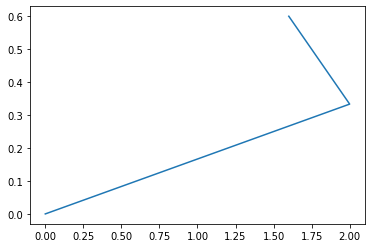

Solução
[[1.60000041]
 [0.59999973]]

Resultado
[[6.00000069]
 [5.        ]]

Diferença
[[6.86761488e-07]
 [0.00000000e+00]]
6.867614876782113e-07



In [8]:
print(f"Convergência ({n} iterações):")

plt.plot(resultsx,resultsy)
plt.show()

print("Solução",x,sep='\n',end='\n\n')
print("Resultado",A.dot(x),sep='\n',end='\n\n')
print("Diferença",A.dot(x)-b,np.linalg.norm(A.dot(x)-b),sep='\n',end='\n\n')